In [132]:
import pandas as pd
import numpy as np

In [34]:


with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("../test.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

kraken = pd.read_csv("../newtest.log", sep=("\t"), )

In [149]:


with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("../data/boven2_all_report.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

df_boven = pd.read_csv("../newtest.log", sep=("\t"), )

In [150]:


with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("../data/onder1_all_report.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

df_onder = pd.read_csv("../newtest.log", sep=("\t"), )

In [151]:
with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("../data/midden3_all_report.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

df_midden = pd.read_csv("../newtest.log", sep=("\t"), )

1) Percentage of fragments covered by the clade rooted at this taxon
2) Number of fragments covered by the clade rooted at this taxon
3) Number of fragments assigned directly to this taxon

(U)nclassified, (R)oot, (D)omain, (K)ingdom, (P)hylum, (C)lass,
(O)rder, (F)amily, (G)enus, (S)pecies

filter on genus

In [125]:
def filtah(kraken, filtar):
    values = set(kraken['rank_code'])

    phylo = [value if filtar in str(value) else "" for value in values]
    order_genus = kraken.loc[kraken['rank_code'].isin(phylo)].sort_values(by='perc_frag',  ascending=False)
    return  order_genus

In [206]:
df_midden_f = filtah(df_midden, "F")
df_boven_f = filtah(df_boven, "F")
df_onder_f = filtah(df_onder, "F")

import matplotlib as mpl

C:\Users\Laris\AppData\Local\Temp\ipykernel_6288\2940856033.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(replace, replace_with, inplace=True)
C:\Users\Laris\AppData\Local\Temp\ipykernel_6288\2940856033.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(replace, replace_with, inplace=True)


['Sphingosinicellaceae', 'Parvicellaceae', 'Silvanigrellaceae', 'Aliceevansviridae', 'Coraliomargaritaceae', 'Deferribacteraceae', 'Thermofilaceae', 'Desulfurococcaceae', 'mealybugsecondaryendosymbionts', 'Schleiferiaceae', 'CandidatusSaccharimonadaceae', 'Bacteriovoracaceae', 'Lichenihabitantaceae', 'Ruaniaceae', 'Endomicrobiaceae', 'Nanoviridae', 'Halieaceae', 'Nannocystaceae', 'Ornithinimicrobiaceae', 'ThermoanaerobacteralesFamilyIV.IncertaeSedis', 'Flexistipitaceae', 'Methanocorpusculaceae', 'Caedimonadaceae', 'Catenulisporaceae', 'Thermoleophilaceae', 'Melioribacteraceae', 'Sporolactobacillaceae', 'Breoghaniaceae', 'CandidatusNanosynbacteraceae', 'CandidatusUabimicrobiaceae', 'Fluviibacteraceae', 'Kineosporiaceae', 'Gemmatimonadaceae', 'Cerasicoccaceae', 'Halomagnusviridae', 'Kytococcaceae', 'Aquaspirillaceae', 'Haliovirgaceae', 'CandidatusMethanomethylophilaceae', 'Immundisolibacteraceae', 'Geovibrionaceae', 'CandidatusChazhemtobacteraceae', 'Minwuiaceae', 'Salinisphaeraceae', 'M

C:\Users\Laris\AppData\Local\Temp\ipykernel_6288\2940856033.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


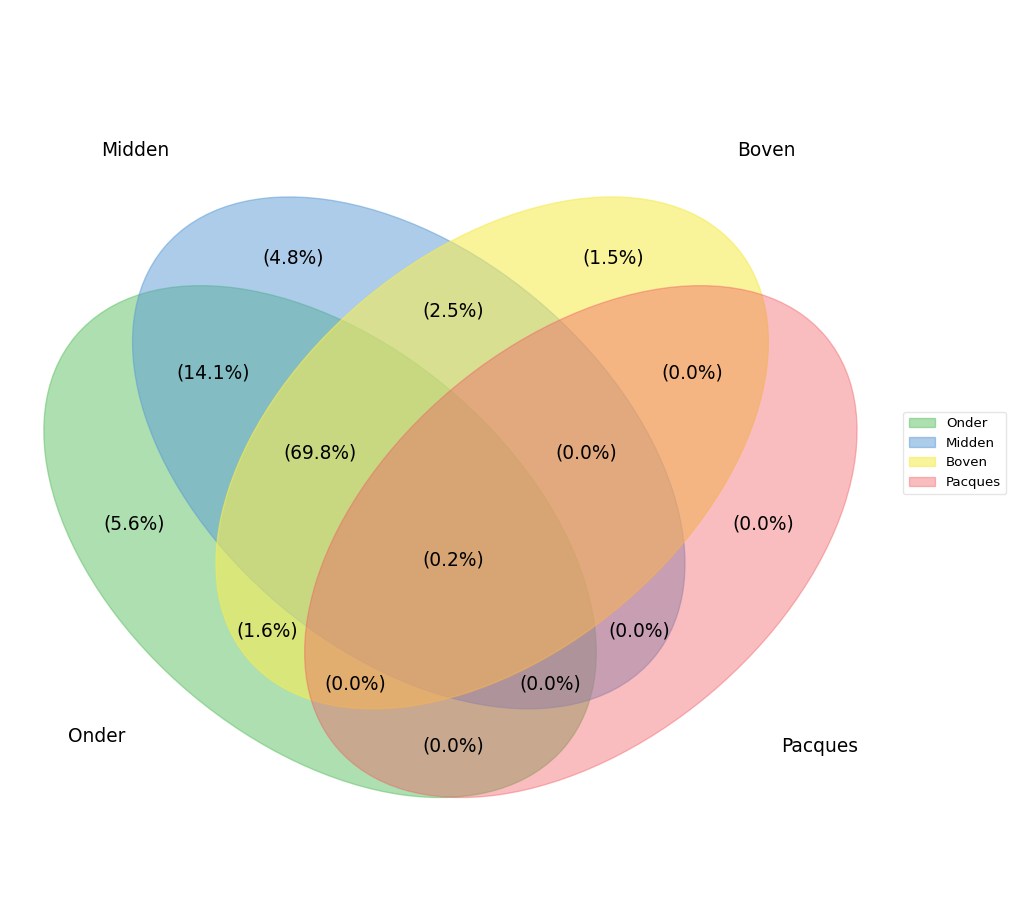

In [186]:
%matplotlib inline

import venn


def make_num(dataframe, changes):
    replace_with = 0
    for replace in set(dataframe["taxonomic_name"]):
        replace_with +=1
        changes[replace_with] = replace
        dataframe.replace(replace, replace_with, inplace=True)
        list_string = dataframe['taxonomic_name'].tolist()
    return [str(x) for x in list_string], changes

def make_num(dataframe, changes):
    if not changes:
        replace_with = 0
        for replace in set(dataframe["taxonomic_name"]):
            replace_with +=1
            changes[replace_with] = replace
            dataframe.replace(replace, replace_with, inplace=True)
    else:
        filtered_list = [string for string in list(set(dataframe["taxonomic_name"])) if string not in list(changes.values())]
        print(filtered_list)
        for replace_with in changes:
            replace = changes[replace_with]
            dataframe.replace(replace, replace_with, inplace=True)
        if filtered_list:
             print("in")
             for replace in filtered_list:
                replace_with +=1
                changes[replace_with] = replace
                dataframe.replace(replace, replace_with, inplace=True)
    list_string = dataframe['taxonomic_name'].tolist()
    return [str(x) for x in list_string], changes
                 


changes = {}
venn_b, changes_b = make_num(df_boven_f, changes)
venn_m, changes_m = make_num(df_midden_f, changes_b)
venn_o, changes_o = make_num(df_onder_f, changes_m)
venn_p = ["1"]

labels = venn.get_labels([venn_o, venn_m, venn_b, venn_p], fill=['percent'])
fig, ax = venn.venn4(labels, names=['Onder', 'Midden', 'Boven', 'Pacques'])
fig.show();


set met alle overeenkomende bacterien

In [207]:
s_pac = set(venn_p)
s_bov = set(venn_b)
s_mid = set(venn_m)
s_ond = set(venn_o)

intersect = s_ond.intersection(s_bov, s_mid)

def intersect_org(intersect, df):
    """
    makes a df of the top 10 organismen in the intersect between sets
    df: a dataframe from what you want to know the percentages of the org
    """
    l = []
    for num in list(intersect)[:10]:
        org = changes_o[int(num)]
        l.append(org)
    intersect_df = df.loc[df['taxonomic_name'].isin(l)]
    return intersect_df

df_intersect_b = intersect_org(intersect, df_boven_f)
df_intersect_o = intersect_org(intersect, df_onder_f)
df_intersect_m = intersect_org(intersect, df_midden_f)

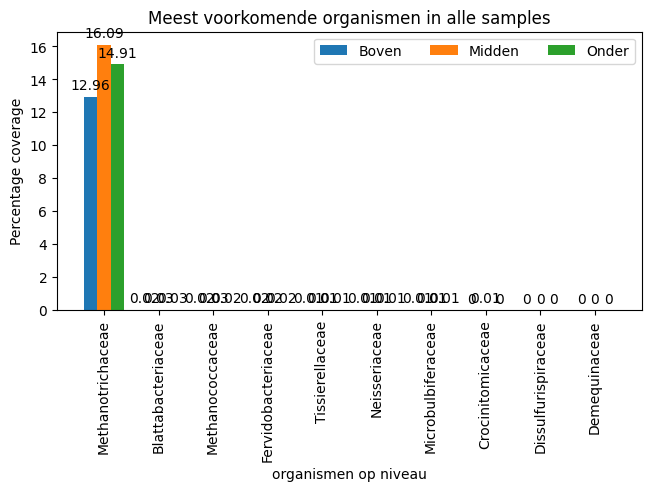

In [222]:
import matplotlib.pyplot as plt
import numpy as np

species = list(df_intersect_o["taxonomic_name"])
penguin_means = {
    "Boven": df_intersect_b["perc_frag"],
    "Midden": df_intersect_m["perc_frag"],
    "Onder": df_intersect_o["perc_frag"]
}


x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage coverage')
ax.set_xlabel('organismen op niveau')
ax.set_title("Meest voorkomende organismen in alle samples")
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
plt.xticks(rotation=90)
plt.show()

#thanks to matplotlib voorbeeld<3